# Northwind Employee Sales Report

In this report, examine how well employees of Northwind are preforming in terms of sales data. 
We hope to provide an informative report that is a thorough assessment of the employees. To do this, we examined a modified version of the _Northwind SQL Database_, the original can be found [here](https://github.com/jpwhite3/northwind-SQLite3).

This database holds employee records, order and product details, as well as sales information. 

### Import Packages and Data

We first import the packages we will utilize while analyzing the northwind sql database and establish a connection to the database file. 

In [2]:
#libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
con = sqlite3.connect("northwind.sqlite")

Here, are the possible schemas of the Northwind File:

In [5]:
pd.read_sql("SELECT * FROM sqlite_schema WHERE type = 'table';", con)

,type,name,tbl_name,rootpage,sql
0,table,Categories,Categories,2,CREATE TABLE [Categories]\n( [CategoryID]...
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,CustomerCustomerDemo,CustomerCustomerDemo,28,CREATE TABLE [CustomerCustomerDemo](\n [Cust...
3,table,CustomerDemographics,CustomerDemographics,30,CREATE TABLE [CustomerDemographics](\n [Cust...
4,table,Customers,Customers,32,CREATE TABLE [Customers]\n( [CustomerID] ...
5,table,Employees,Employees,38,CREATE TABLE [Employees]\n( [EmployeeID] ...
6,table,EmployeeTerritories,EmployeeTerritories,68,CREATE TABLE [EmployeeTerritories](\n [Emplo...
7,table,Order Details,Order Details,70,CREATE TABLE [Order Details](\n [OrderID]INT...
8,table,Orders,Orders,92,CREATE TABLE [Orders](\n [OrderID]INTEGER NO...
9,table,Products,Products,128,CREATE TABLE [Products](\n [ProductID]INTEGE...


### Create Master Dataframes

We first created a large dataframe containing the variables we were interested in useing to asses employee sales. The Emp_Sales_df is a dataframe merged from three smaller merged dataframes: df1, df2, df3, and df4. This dataframe will contain the information for all of the employees.
- The first dataframe, df1, was made by combing  employee details and the territory details from table `Employees` and `EmployeeTerritories` in the SQL schema. 
- df2 merged df1 and relevent details from the `Orders` table. 
- df3 was created by merging df2 and all the information from the `Order Details` table
  - A new column "ProductTotal" was added, by multiplying (item quanity) by (unit price)- (product discount)
  - Then, "OrderYear" "OrderMonth" colums were created by slicing information from the "OrderDate" column. 
  - The "OrderDate" column was then deleted. 
- df4 added the Regional Descriptions that Each employee represented

In [18]:
df1 = pd.merge(left = pd.read_sql("SELECT  EmployeeID, Title, LastName, FirstName, Region FROM Employees;", con),
        right = pd.read_sql("SELECT  EmployeeID, TerritoryID FROM EmployeeTerritories;", con),
        how = "inner",
        on = "EmployeeID")

#df2 adds orderID, CustomerID EmployeeID and OrderDate
df2 = pd.merge(left = df1,
              right = pd.read_sql("SELECT OrderID, CustomerID, EmployeeID, OrderDate FROM Orders", con),
              how = "inner",
              on = "EmployeeID")

#df3 adds all the columns from the table 'Order Details'
df3 = pd.merge(left = df2,
               right = pd.read_sql("SELECT * FROM 'Order Details'", con),
               how = "inner",
               on = "OrderID")
# calculate the amount for one product within one order
df3['ProductTotal'] = df3['UnitPrice']*df3['Quantity']*(1-df3['Discount'])
# chage the date to year
df3['OrderYear'] = [x[:4] for x in df3.OrderDate]
df3['OrderMonth']=[x[5:7] for x in df3.OrderDate]
df3 = df3.drop('OrderDate', axis = 1)

#adding Territory and RegionIDs
df4=pd.merge(left=df3,
             right=pd.read_sql("SELECT TerritoryID, RegionID FROM 'Territories'",con),
             how="inner",
             on= "TerritoryID")

#adding region descriptions
Emp_Sales_df=pd.merge(left=df4,
                     right= pd.read_sql("SELECT * FROM Regions", con),
                     how="inner",
                     on="RegionID")
Emp_Sales_df['EmployeeID']=EmpSales_df['EmployeeID'].astype(str)
Emp_Sales_df.head(1)

,EmployeeID,Title,LastName,FirstName,Region,TerritoryID,OrderID,CustomerID,ProductID,UnitPrice,Quantity,Discount,ProductTotal,OrderYear,OrderMonth,RegionID,RegionDescription
0,1,Sales Representative,Davolio,Nancy,WA,06897,10258,ERNSH,2,15.2,50,0.2,608.0,1996,07,1,Eastern ...


Now, we will do similar steps as above to pull out only the employees who are **sales representatives** from the data. This is important because we want to look at all of the employees of the company, and all of the employees that are solely focused on sales. This will help us to better evaluate employees based on their sales. Our dataframe from this step will be called **SalesRep_Sales_df**. 

In [19]:
SalesRep_Sales_df=EmpSales_df[EmpSales_df['Title']=='Sales Representative'].reset_index(drop=True)
SalesRep_Sales_df.head()

,EmployeeID,Title,LastName,FirstName,Region,TerritoryID,OrderID,CustomerID,ProductID,UnitPrice,Quantity,Discount,ProductTotal,OrderYear,OrderMonth,RegionID,RegionDescription
0,1,Sales Representative,Davolio,Nancy,WA,06897,10258,ERNSH,2,15.2,50,0.2,608.00,1996,07,1,Eastern ...
1,1,Sales Representative,Davolio,Nancy,WA,06897,10258,ERNSH,5,17.0,65,0.2,884.00,1996,07,1,Eastern ...
2,1,Sales Representative,Davolio,Nancy,WA,06897,10258,ERNSH,32,25.6,6,0.2,122.88,1996,07,1,Eastern ...
3,1,Sales Representative,Davolio,Nancy,WA,06897,10270,WARTH,36,15.2,30,0.0,456.00,1996,08,1,Eastern ...
4,1,Sales Representative,Davolio,Nancy,WA,06897,10270,WARTH,43,36.8,25,0.0,920.00,1996,08,1,Eastern ...


### Analyze Subsets of the Dataframes

After we had a working dataframe to analyse, we subsetted it to look at different variables. Below, we explore trends in the amount of money made per year, across years, per order, and within different regions for each employee. We will look at all the employee and also run a separate analysis to look at only sales representatives. 

With **Emp_Sales_df**, we parsed the data to look at money made by all of the employees in different years. Below, we looked at how much money each empolyee made in 1996, 1997, and 1998.  

In [20]:
total_sales=Emp_Sales_df.groupby(['OrderYear','EmployeeID'], as_index=False)['ProductTotal'].sum().round(2)
total_sales

,OrderYear,EmployeeID,ProductTotal
0,1996,1,71529.03
1,1996,2,152299.42
2,1996,3,72895.84
3,1996,4,149835.34
4,1996,5,128687.44
5,1996,6,83213.02
6,1996,7,152321.60
7,1996,8,88960.48
8,1996,9,69261.60
9,1997,1,186296.16


As well as looking at money trends across years, we also looked at the total amount of money made with each individual order,as well as the average order total. We did this for all employees and for only sales representatives. We see that the average order for all emplpoyees is `$7476.27`, but the average order size for just the sales reps is `$6888.88`. 

In [38]:
Order_total_emp=Emp_Sales_df.groupby('OrderID')['ProductTotal'].sum()

print(f"The average order placed in *all employees* was ${np.mean(Order_total).round(2)}.")
print(Order_total_emp)

The average order placed in *all employees* was $7476.27.


OrderID
10248     3080.000
10249     9317.000
10250     4657.800
10251     2616.240
10252    10793.700
           ...    
11073     2100.000
11074     2320.850
11075     1992.400
11076     2378.250
11077     2511.441
Name: ProductTotal, Length: 830, dtype: float64

In [40]:
Order_total_salesrep= SalesRep_Sales_df.groupby('OrderID')['ProductTotal'].sum()

print(f"The average order placed by sales representitive employees was ${np.mean(Order_total_salesrep).round(2)}.")
print('\n', Order_total_salesrep)

The average order placed in *all employees* was $6888.68.

 OrderID
10249     9317.000
10250     4657.800
10251     2616.240
10252    10793.700
10253     5779.200
           ...    
11071      969.000
11072    15654.000
11074     2320.850
11076     2378.250
11077     2511.441
Name: ProductTotal, Length: 588, dtype: float64


We then created a pivot table from **Emp_Sales_df** using the columns "EmployeeID", "OrderYear", "TerritoryID", and the sum of "ProductTotal" to get a look at annual sales income compared across years and territories for each employee. 

Ultimately, we found that "TerritoryID" was not a useful variable for our analysis, as the annual total was the same for different territory IDs under unique Employee IDs

In [42]:
pivot_data = pd.pivot_table(Emp_Sales_df, values = 'ProductTotal', index = ['EmployeeID', 'OrderYear', 'TerritoryID'], aggfunc = ['sum'])
pivot_data

sum
                                 ProductTotal
EmployeeID OrderYear TerritoryID             
1          1996      06897         35764.5150
                     19713         35764.5150
           1997      06897         93148.0775
                     19713         93148.0775
           1998      06897         63195.0120
...                                       ...
9          1998      48075         41103.1590
                     48084         41103.1590
                     48304         41103.1590
                     55113         41103.1590
                     55439         41103.1590

[147 rows x 1 columns]

The `AnnualSales_df` was created by grouping orders by employee ids, order year, and order total. The graphical summary can be seen below. Employee 2 (Vice President, Andrew Fuller) and employee 7 (Sales Representitive, Robert King) consistently have a high sales performace. The best sales year was 1997.

In [5]:
# group by EmployeeID and OrderYear
group1_df = pd.DataFrame(zip(EmpSales_df.groupby(['EmployeeID','OrderYear'])['EmployeeID'].unique().astype(int),
                         EmpSales_df.groupby(['EmployeeID', 'OrderYear'])['OrderYear'].unique().astype(int),
                         EmpSales_df.groupby(['EmployeeID', 'OrderYear'])['ProductTotal'].sum()),
                     columns = ['EmployeeID', 'OrderYear','ProductTotal'])
SalesGroup_df=group1_df.rename(columns={'ProductTotal':'AnnualSalesTotal'})

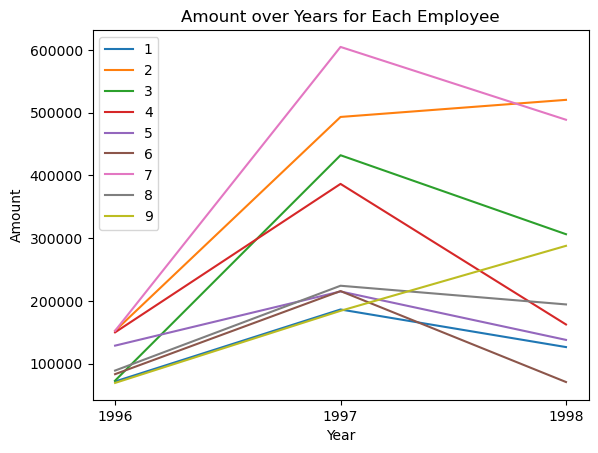

In [6]:
# draw plot
AnnualSales = SalesGroup_df.groupby('EmployeeID')

for name, group in AnnualSales:
  plt.plot(group['OrderYear'].astype(str), group['AnnualSalesTotal'], label = name)

plt.legend()
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Amount over Years for Each Employee')

plt.show()

Here, we see how the different emplpoyees compare on a five-point summary.Employee #7 has an outlier every year... Wonder what factors may be driving it

In [7]:
# group by OrderID
OrderGroup_df = pd.DataFrame(zip(EmpSales_df.groupby('OrderID')['EmployeeID'].unique().astype(int),
                         EmpSales_df.groupby('OrderID')['OrderYear'].unique().astype(int),
                        EmpSales_df.groupby('OrderID')['ProductTotal'].sum()),
                     columns = ['EmployeeID','OrderYear','ProductTotal'])
OrderGroup_df=OrderGroup_df.rename(columns={'ProductTotal':'OrderTotal'})

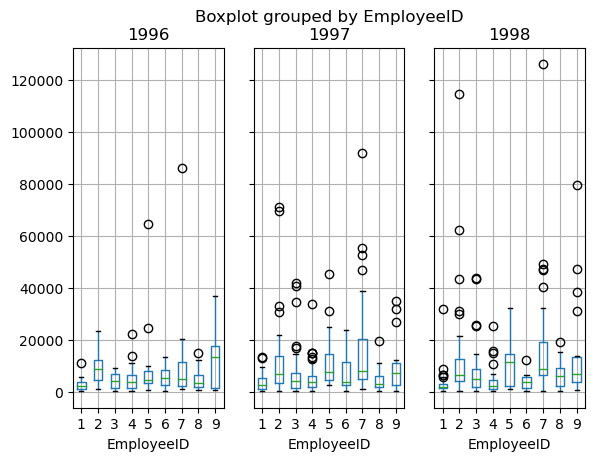

In [8]:
OrderGroup_df.groupby("OrderYear").boxplot(column = "OrderTotal", by = "EmployeeID", layout = [1,3])
plt.show()

In [9]:
RegionalGroup_df = pd.DataFrame(zip(EmpSales_df.groupby('OrderID')['EmployeeID'].unique().astype(int),
                         EmpSales_df.groupby('OrderID')['RegionDescription'].unique().astype(str),
                        EmpSales_df.groupby('OrderID')['ProductTotal'].sum()),
                     columns = ['EmployeeID','RegionDescription','ProductTotal'])
RegionalGroup_df=RegionalGroup_df.rename(columns={'ProductTotal':'OrderTotal'})

Regional_pivot_data = pd.DataFrame.pivot_table(RegionalGroup_df, values = 'OrderTotal', 
                                               index = ['RegionDescription','EmployeeID'])
#Regional_pivot_data.index
Regional_pivot_data

OrderTotal
RegionDescription                                  EmployeeID              
['Eastern                                      ... 1            3123.700886
                                                   2           12143.377969
                                                   4            4478.670115
                                                   5           11465.380417
['Northern                                     ... 8            4879.318365
                                                   9           12585.034081
['Southern                                     ... 3            6387.806079
['Westerns                                     ... 6            5515.905187
                                                   7           17301.143750

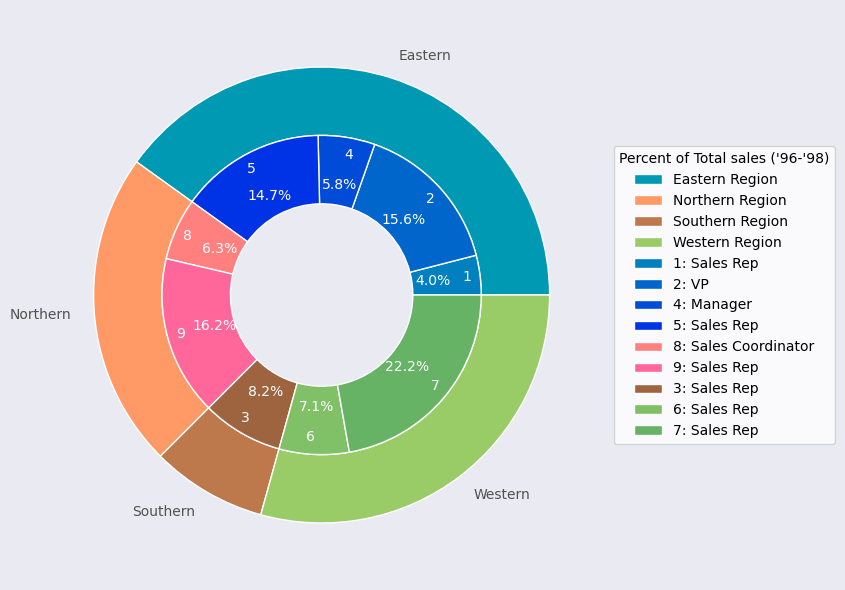

In [19]:
df=Regional_pivot_data
facecolor = '#eaeaf2'
font_color = '#525252'
hfont = {'fontname':'Calibri'}
outerlabels = ['Eastern','Northern','Southern','Western']
size = 0.3
vals = df['OrderTotal'].droplevel(0)
# Major category values = sum of minor category values
group_sum = df.groupby('RegionDescription')['OrderTotal'].sum()

fig, ax = plt.subplots(figsize=(10,6), facecolor=facecolor)

a,b,c,d = [plt.cm.winter, plt.cm.spring, plt.cm.copper, plt.cm.summer]

outer_colors = [a(.6), b(.6), c(.6), d(.6)]
inner_colors = [a(.5), a(.4), a(.3), a(.2),
                b(.5), b(.4), 
                c(.5), 
                d(.5), d(.4)]

ax.pie(group_sum, 
       radius=1, 
       colors=outer_colors, 
       labels=outerlabels, 
       textprops={'color':font_color},
       wedgeprops=dict(width=size, edgecolor='w'))

wedges_inner = ax.pie(vals, 
       radius=1-size, #size=0.3,  
                      colors=inner_colors,
                      autopct = "%.1f%%",
                      pctdistance = 0.7,
       labels=[x[1] for x in df.index.values],
                                 labeldistance = 0.89,
                      textprops={"color":"w"},
       wedgeprops=dict(width=size, edgecolor='w'))


ax.legend(title="Percent of Total sales ('96-'98)",
          loc="center left",
          labels = ["Eastern Region", "Northern Region", "Southern Region", "Western Region","1: Sales Rep","2: VP","4: Manager",
                    "5: Sales Rep","8: Sales Coordinator","9: Sales Rep","3: Sales Rep","6: Sales Rep","7: Sales Rep"],
          bbox_to_anchor=(1,0,0.5,1))


plt.tight_layout()

In [44]:
SR_Regional_Group_df = pd.DataFrame(zip(SalesRep_Sales_df.groupby('OrderID')['EmployeeID'].unique().astype(int),
                         SalesRep_Sales_df.groupby('OrderID')['RegionDescription'].unique().astype(str),
                        SalesRep_Sales_df.groupby('OrderID')['ProductTotal'].sum()),
                     columns = ['EmployeeID','RegionDescription','ProductTotal'])
SR_Regional_Group_df=SR_Regional_Group_df.rename(columns={'ProductTotal':'OrderTotal'})

SR_Regional_pivot_data = pd.DataFrame.pivot_table(SR_Regional_Group_df, values = 'OrderTotal', 
                                               index = ['RegionDescription','EmployeeID'])
#Regional_pivot_data.index
SR_Regional_pivot_data

OrderTotal
RegionDescription                                  EmployeeID              
['Eastern                                      ... 1            3123.700886
                                                   4            4478.670115
['Northern                                     ... 9           12585.034081
['Southern                                     ... 3            6387.806079
['Westerns                                     ... 6            5515.905187
                                                   7           17301.143750

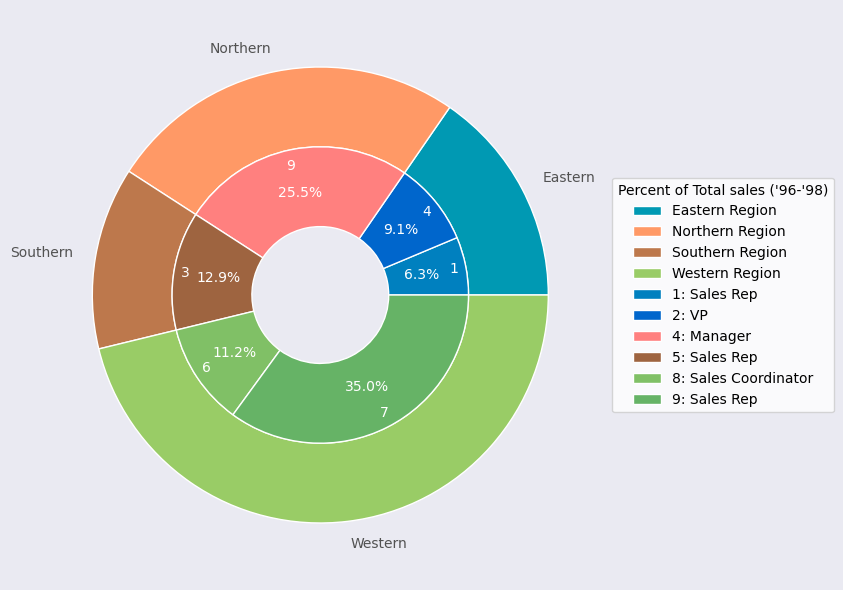

In [45]:
#Comparing only sales associates
df1=SR_Regional_pivot_data
facecolor = '#eaeaf2'
font_color = '#525252'
hfont = {'fontname':'Calibri'}
outerlabels = ['Eastern','Northern','Southern','Western']
size = 0.35
vals = df1['OrderTotal'].droplevel(0)
# Major category values = sum of minor category values
group_sum = df1.groupby('RegionDescription')['OrderTotal'].sum()

fig, ax = plt.subplots(figsize=(10,6), facecolor=facecolor)

a,b,c,d = [plt.cm.winter, plt.cm.spring, plt.cm.copper, plt.cm.summer]

outer_colors = [a(.6), b(.6), c(.6), d(.6)]
inner_colors = [a(.5), a(.4),
                b(.5), 
                c(.5), 
                d(.5), d(.4)]

ax.pie(group_sum, 
       radius=1, 
       colors=outer_colors, 
       labels=outerlabels, 
       textprops={'color':font_color},
       wedgeprops=dict(width=size, edgecolor='w'))

wedges_inner = ax.pie(vals, 
       radius=1-size, #size=0.3,  
                      colors=inner_colors,
                      autopct = "%.1f%%",
                      pctdistance = 0.7,
       labels=[x[1] for x in df1.index.values],
                                 labeldistance = 0.89,
                      textprops={"color":"w"},
       wedgeprops=dict(width=size, edgecolor='w'))


#plt.legend(patches, labels, loc="best")
### still doesn't exactly work
ax.legend(title="Percent of Total sales ('96-'98)",
          loc="center left",
          labels = ["Eastern Region", "Northern Region", "Southern Region", "Western Region","1: Sales Rep","2: VP","4: Manager",
                    "5: Sales Rep","8: Sales Coordinator","9: Sales Rep","3: Sales Rep","6: Sales Rep","7: Sales Rep"],
          bbox_to_anchor=(1,0,0.5,1))

plt.tight_layout()

### Investigating customer infulences

First we find top five customers, ranked on the total sales they provide to the companany. 

In [50]:
# get the list of top 5 customer 
top5_customer = list(Emp_Sales_df.groupby('CustomerID')['ProductTotal'].sum().sort_values(ascending=False).index[:5])
#
#Emp_Sales_df['NewCustomerID'] =
top5_customer

['SAVEA', 'QUICK', 'ERNSH', 'HUNGO', 'RATTC']

In [51]:
newCustomerID = []
for x in list(Emp_Sales_df['CustomerID']):
    if x in top5_customer:
        newCustomerID.append(x)
    else:
        newCustomerID.append('OTHER')
#newCustomerID
Emp_Sales_df['NewCustomerID'] = newCustomerID
#Emp_Sales_df.head(5)

In [52]:
client_df= pd.DataFrame(zip(Emp_Sales_df.groupby('OrderID')['NewCustomerID'].unique().astype(str),
                            Emp_Sales_df.groupby('OrderID')['EmployeeID'].unique().astype(int),
                        Emp_Sales_df.groupby('OrderID')['ProductTotal'].sum()),
                     columns = ['NewCustomerID','EmployeeID','ProductTotal'])
client_df=client_df.rename(columns={'ProductTotal':'OrderTotal'})
client_df.head()

,NewCustomerID,EmployeeID,OrderTotal
0,['OTHER'],5,3080.00
1,['OTHER'],6,9317.00
2,['OTHER'],4,4657.80
3,['OTHER'],3,2616.24
4,['OTHER'],4,10793.70


In [53]:
emp_client_df=pd.DataFrame(client_df.groupby(["EmployeeID","NewCustomerID"])["OrderTotal"].sum()).reset_index()

emp_client_pivot = pd.pivot_table(data = emp_client_df, index = ["EmployeeID"], columns = ["NewCustomerID"])
# reorder. set OTHER as the first one
emp_client_pivot = emp_client_pivot.iloc[:,[2, 0, 1, 3, 4, 5]]
                      
emp_client_pivot

OrderTotal                                               \
NewCustomerID    ['OTHER']    ['ERNSH'] ['HUNGO']  ['QUICK']  ['RATTC']   
EmployeeID                                                                
1              265178.0080   34174.5600   5038.00   13634.20  24884.241   
2              657905.4650   74925.4100  74234.86  298905.60   6326.250   
3              491960.2920   79045.4000  66460.18   91130.78  67317.120   
4              558918.8475   51925.9755   4099.20   36684.18   9364.950   
5              348489.9775          NaN       NaN   31347.05   9779.000   
6              236974.0475   21884.4000  37790.00        NaN   7280.000   
7              821493.8250  164337.9250  25987.60   15030.00        NaN   
8              360999.6800   40942.3500   5255.28   60950.80  14272.000   
9              278255.9605   62774.6000  51827.30   31708.60  79660.000   

                           
NewCustomerID   ['SAVEA']  
EmployeeID                 
1               41306.200  
2               53466.700  
3               15337.600  
4               37679.385  
5               91929.950  
6               65637.200  
7              218833.000  
8               25029.000  
9               36930.005

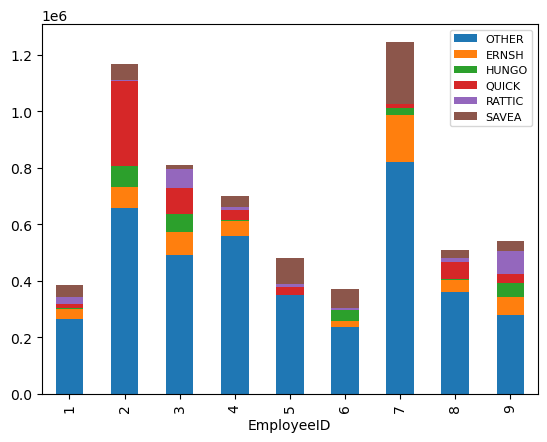

In [65]:
fig, ax = plt.subplots()
#plt.title('Top five customers and associate interaction')
emp_client_pivot.plot.bar(stacked=True, ax = ax)
ax.legend(['OTHER', 'ERNSH', 'HUNGO', 'QUICK', 'RATTIC', 'SAVEA'], prop={'size': 8})
plt.show()

# Part 3
For part 3, we’re going to redo some of the homework 6 NFL data analysis via spark. (This part should be very easy/short! We’ll use spark SQL and/or pandas-on-spark functionality rather than writing our own MapReduce type code.) 

To do:
• Read in the full nfl data set into spark as a spark data frame
• Use spark SQL to find the mean and standard deviation for the AQ1, AQ2, AQ3, AQ4, AQFinal, HQ1, HQ2, HQ3, HQ4, and HFinal variables
• Find the mean and standardeviation for those same columns but do so for each value of the season variable

Now, repeat the three steps above but use pandas-on-spark rather than spark SQL! As always, you should have a basic narrative flowing through what you are doing and an interpretation of any stats/graphs created.